# Speed up your Pandas Code

# Create our Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(size=10_000):
    """
    Generate random data and return as a DataFrame.

    Parameters:
    size (int): Number of rows to generate (default is 10,000).

    Returns:
    pd.DataFrame: DataFrame containing random data.
    """

    # Create an empty DataFrame
    df = pd.DataFrame()

    # Generate random data for the DataFrame columns
    df['age'] = np.random.randint(0, 100, size)  # Random integer values between 0 and 100 for age
    df['time_in_bed'] = np.random.randint(0, 9, size)  # Random integer values between 0 and 9 for time_in_bed
    df['pct_sleeping'] = np.random.rand(size)  # Random float values between 0 and 1 for pct_sleeping
    df['favorite_food'] = np.random.choice(['pizza', 'taco', 'ice-cream'], size)  # Random choices for favorite_food
    df['hate_food'] = np.random.choice(['broccoli', 'candy corn', 'eggs'], size)  # Random choices for hate_food

    return df


In [2]:
df = get_data()

# The Problem

### Reward calculation:

* If they were in bed for more than 5 hours AND they were sleeping for more than 50% we give them their favorite food.
* Otherwise we give them their hate food.
* If they are over 90 years old give their favorite food regardless.

In [3]:
def reward_calc(row):
    """
    Calculate reward based on specific conditions.

    Parameters:
    row (pd.Series): A row of data from a DataFrame.

    Returns:
    str: The reward based on the conditions.
    """

    if row['age'] >= 90:
        return row['favorite_food']
    
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favorite_food']
    
    return row['hate_food']


# Level 1 - Loop

In [4]:
%%timeit
# Apply reward_calc function to each row of the DataFrame using apply function
df['reward'] = df.apply(reward_calc, axis=1)


32 ms ± 92.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Level 2 - Apply

In [5]:
%%timeit
# Apply the reward_calc function to each row in the DataFrame using apply function
# along the rows (axis=1) and assign the result to the 'reward' column
df['reward'] = df.apply(reward_calc, axis=1)


31.9 ms ± 58.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Level 3 - Vectorized

In [6]:
%%timeit
# Assign 'hate_food' to the 'reward' column initially
df['reward'] = df['hate_food']

# Update 'reward' column based on conditions:
# If both pct_sleeping > 0.5 and time_in_bed > 5 or age > 90, update 'reward' with 'favorite_food'
df.loc[((df['pct_sleeping'] > 0.5) & (df['time_in_bed'] > 5)) | (df['age'] > 90), 'reward'] = df['favorite_food']


336 µs ± 3.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Plot Diffrences

In [7]:
results = pd.DataFrame(
    [
        ["loop", 33.6, 0.0331],
        ["apply", 33.5, 0.0457],
        ["vec", 0.344, 0.000387],
    ],
    columns=["type", "mean", "std"]
)


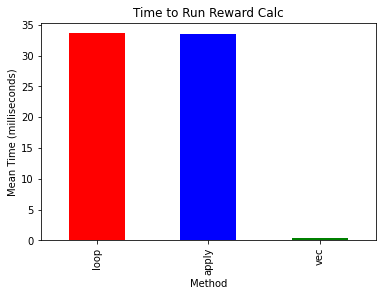

In [8]:
ax = results.set_index('type')['mean'].plot(kind='bar', color=['red', 'blue', 'green'], title='Time to Run Reward Calc')
ax.set_ylabel('Mean Time (milliseconds)')
ax.set_xlabel('Method')
plt.show()
